# K-means Clustering Tugas 5

K-Means clustering adalah algoritma yang digunakan untuk mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda. Simbol K pada K-means clustering menandakan jumlah kluster yang digunakan.


K means clustering merupakan metode algoritma dasar,yang diterapkan sebagai berikut

Menentukan jumlah cluster
Secara acak mendistribusikan data cluster
Menghitung rata rata dari data yang ada di cluster.
Menggunakan langkah baris 3 kembali sesuai nilai treshold
Menghitung jarak antara data dan nilai centroid(K means clustering)
Distance space dapat diimplementasikan untuk menghitung jarak data dan centroid. Contoh penghitungan jarak yang sering digunakan adalah manhattan/city blok distance

Clustering Algoritma (K-Means) memiliki tujuan untuk meminimalisasikan fungsi objective yang telah di set dalam proses clustering. Tujuan tersebut dilakukan dengan cara meminimalikan variasi data yang ada didalam cluster dan memaksimalikan variasi data yang ada di cluster lainnya.

In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
url = "https://raw.githubusercontent.com/MeAdila/dataset/main/IRIS.csv"

In [4]:
al = pd.read_csv(url)
al.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
without_label = al.drop(columns=["species"])
without_label

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Hitung Data

*   Pisahkan *feature* "variety" dari *dataframe*
*   Tentukan nilai **K** atau *centroid*
*   Hitung jarak data terhadap *centroid*
*   Hitung rata-rata data per-*cluster*

In [7]:
# separate target 

# values
X=al.iloc[:,0:4].values

# 
y = al.values[:,4]

In [9]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(y)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# data_tes = np.array(labels)
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=1)
kmeans.fit(X)
# kmeans.labels_
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_
centroids

array([[5.00784314, 3.4       , 1.49411765, 0.26078431],
       [5.96865672, 2.76865672, 4.48507463, 1.46716418],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ]])

In [11]:
al = pd.DataFrame(labels, columns=["Label"])
al

,Label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,1
147,2
148,2


In [12]:
from sklearn.decomposition import PCA
pca = PCA()
# pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

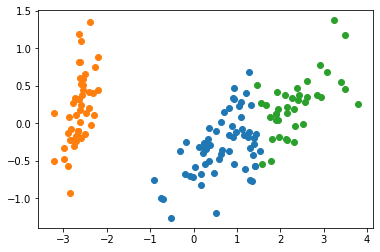

In [13]:
# retrieve unique clusters
clusters = unique(labels)
# fit the model
kmeans.fit(X)
# assign a cluster to each example
yhat = kmeans.predict(X)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1])
# show the plot
pyplot.show()